In [29]:
import keras.backend as K
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

from keras.layers import Dense, Input, BatchNormalization
from keras.models import Model

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [3]:
pearsonr([1,2,3,4], [5,7,6,8])

(0.8, 0.19999999999999993)

In [4]:
X = datasets.load_iris()['data']
y = np.random.rand(150) * 10

In [27]:
pearsonr(X[:, 3], y)

(0.003958735679187486, 0.9616532789445786)

In [11]:
from keras import backend as K
def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return -K.abs(r)

def pearson_r(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.sum(xm * ym)
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = K.sqrt(x_square_sum * y_square_sum)
    r = r_num / r_den
    return -K.square(K.mean(r))

In [12]:
input_ = Input(shape=(4, ))

x = Dense(16, activation='relu')(input_)
x = BatchNormalization()(x)
x = Dense(8, activation='relu')(x)
x = BatchNormalization()(x)
output = Dense(1, activation='linear')(x)

model = Model(input_, output)
model.compile(loss=correlation_coefficient_loss, optimizer='adam', metrics=[correlation_coefficient_loss])
# model.compile(loss=pearson_r, optimizer='adam', metrics=[pearson_r])
model.summary()

W0522 23:07:50.807612 140717759285056 deprecation.py:237] From /home/rossleecooloh/.pyenv/versions/3.6.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4139: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0522 23:07:50.871312 140717759285056 deprecation.py:506] From /home/rossleecooloh/.pyenv/versions/3.6.6/lib/python3.6/site-packages/tensorflow/python/training/moving_averages.py:211: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 321
Trainable params: 273
Non-trainable params: 48
_________________________________________________________________


In [21]:
model.fit(X, y, batch_size=150, epochs=800)

Epoch 1/800
150/150 [==============================] - 0s 20us/step - loss: -0.6253 - correlation_coefficient_loss: -0.6253
Epoch 2/800
150/150 [==============================] - 0s 15us/step - loss: -0.6253 - correlation_coefficient_loss: -0.6253
Epoch 3/800
150/150 [==============================] - 0s 16us/step - loss: -0.6256 - correlation_coefficient_loss: -0.6256
Epoch 4/800
150/150 [==============================] - 0s 16us/step - loss: -0.6255 - correlation_coefficient_loss: -0.6255
Epoch 5/800
150/150 [==============================] - 0s 14us/step - loss: -0.6254 - correlation_coefficient_loss: -0.6254
Epoch 6/800
150/150 [==============================] - 0s 13us/step - loss: -0.6256 - correlation_coefficient_loss: -0.6256
Epoch 7/800
150/150 [==============================] - 0s 16us/step - loss: -0.6253 - correlation_coefficient_loss: -0.6253
Epoch 8/800
150/150 [==============================] - 0s 14us/step - loss: -0.6258 - correlation_coefficient_loss: -0.6258
Epoch 9/

Epoch 67/800
150/150 [==============================] - 0s 11us/step - loss: -0.6265 - correlation_coefficient_loss: -0.6265
Epoch 68/800
150/150 [==============================] - 0s 10us/step - loss: -0.6265 - correlation_coefficient_loss: -0.6265
Epoch 69/800
150/150 [==============================] - 0s 18us/step - loss: -0.6265 - correlation_coefficient_loss: -0.6265
Epoch 70/800
150/150 [==============================] - 0s 10us/step - loss: -0.6264 - correlation_coefficient_loss: -0.6264
Epoch 71/800
150/150 [==============================] - 0s 18us/step - loss: -0.6263 - correlation_coefficient_loss: -0.6263
Epoch 72/800
150/150 [==============================] - 0s 13us/step - loss: -0.6266 - correlation_coefficient_loss: -0.6266
Epoch 73/800
150/150 [==============================] - 0s 10us/step - loss: -0.6264 - correlation_coefficient_loss: -0.6264
Epoch 74/800
150/150 [==============================] - 0s 14us/step - loss: -0.6268 - correlation_coefficient_loss: -0.6268


Epoch 133/800
150/150 [==============================] - 0s 12us/step - loss: -0.6268 - correlation_coefficient_loss: -0.6268
Epoch 134/800
150/150 [==============================] - 0s 11us/step - loss: -0.6273 - correlation_coefficient_loss: -0.6273
Epoch 135/800
150/150 [==============================] - 0s 11us/step - loss: -0.6270 - correlation_coefficient_loss: -0.6270
Epoch 136/800
150/150 [==============================] - 0s 11us/step - loss: -0.6265 - correlation_coefficient_loss: -0.6265
Epoch 137/800
150/150 [==============================] - 0s 11us/step - loss: -0.6272 - correlation_coefficient_loss: -0.6272
Epoch 138/800
150/150 [==============================] - 0s 12us/step - loss: -0.6272 - correlation_coefficient_loss: -0.6272
Epoch 139/800
150/150 [==============================] - 0s 12us/step - loss: -0.6273 - correlation_coefficient_loss: -0.6273
Epoch 140/800
150/150 [==============================] - 0s 13us/step - loss: -0.6274 - correlation_coefficient_loss: 

Epoch 199/800
150/150 [==============================] - 0s 12us/step - loss: -0.6283 - correlation_coefficient_loss: -0.6283
Epoch 200/800
150/150 [==============================] - 0s 11us/step - loss: -0.6278 - correlation_coefficient_loss: -0.6278
Epoch 201/800
150/150 [==============================] - 0s 11us/step - loss: -0.6281 - correlation_coefficient_loss: -0.6281
Epoch 202/800
150/150 [==============================] - 0s 11us/step - loss: -0.6278 - correlation_coefficient_loss: -0.6278
Epoch 203/800
150/150 [==============================] - 0s 12us/step - loss: -0.6281 - correlation_coefficient_loss: -0.6281
Epoch 204/800
150/150 [==============================] - 0s 12us/step - loss: -0.6281 - correlation_coefficient_loss: -0.6281
Epoch 205/800
150/150 [==============================] - 0s 12us/step - loss: -0.6280 - correlation_coefficient_loss: -0.6280
Epoch 206/800
150/150 [==============================] - 0s 10us/step - loss: -0.6280 - correlation_coefficient_loss: 

150/150 [==============================] - 0s 12us/step - loss: -0.6280 - correlation_coefficient_loss: -0.6280
Epoch 265/800
150/150 [==============================] - 0s 12us/step - loss: -0.6292 - correlation_coefficient_loss: -0.6292
Epoch 266/800
150/150 [==============================] - 0s 12us/step - loss: -0.6280 - correlation_coefficient_loss: -0.6280
Epoch 267/800
150/150 [==============================] - 0s 12us/step - loss: -0.6280 - correlation_coefficient_loss: -0.6280
Epoch 268/800
150/150 [==============================] - 0s 11us/step - loss: -0.6288 - correlation_coefficient_loss: -0.6288
Epoch 269/800
150/150 [==============================] - 0s 12us/step - loss: -0.6287 - correlation_coefficient_loss: -0.6287
Epoch 270/800
150/150 [==============================] - 0s 14us/step - loss: -0.6285 - correlation_coefficient_loss: -0.6285
Epoch 271/800
150/150 [==============================] - 0s 15us/step - loss: -0.6288 - correlation_coefficient_loss: -0.6288
Epoch 

Epoch 330/800
150/150 [==============================] - 0s 12us/step - loss: -0.6292 - correlation_coefficient_loss: -0.6292
Epoch 331/800
150/150 [==============================] - 0s 11us/step - loss: -0.6291 - correlation_coefficient_loss: -0.6291
Epoch 332/800
150/150 [==============================] - 0s 12us/step - loss: -0.6296 - correlation_coefficient_loss: -0.6296
Epoch 333/800
150/150 [==============================] - 0s 12us/step - loss: -0.6292 - correlation_coefficient_loss: -0.6292
Epoch 334/800
150/150 [==============================] - 0s 16us/step - loss: -0.6298 - correlation_coefficient_loss: -0.6298
Epoch 335/800
150/150 [==============================] - 0s 12us/step - loss: -0.6293 - correlation_coefficient_loss: -0.6293
Epoch 336/800
150/150 [==============================] - 0s 13us/step - loss: -0.6293 - correlation_coefficient_loss: -0.6293
Epoch 337/800
150/150 [==============================] - 0s 11us/step - loss: -0.6294 - correlation_coefficient_loss: 

150/150 [==============================] - 0s 12us/step - loss: -0.6295 - correlation_coefficient_loss: -0.6295
Epoch 396/800
150/150 [==============================] - 0s 15us/step - loss: -0.6299 - correlation_coefficient_loss: -0.6299
Epoch 397/800
150/150 [==============================] - 0s 28us/step - loss: -0.6297 - correlation_coefficient_loss: -0.6297
Epoch 398/800
150/150 [==============================] - 0s 12us/step - loss: -0.6299 - correlation_coefficient_loss: -0.6299
Epoch 399/800
150/150 [==============================] - 0s 12us/step - loss: -0.6300 - correlation_coefficient_loss: -0.6300
Epoch 400/800
150/150 [==============================] - 0s 12us/step - loss: -0.6301 - correlation_coefficient_loss: -0.6301
Epoch 401/800
150/150 [==============================] - 0s 14us/step - loss: -0.6299 - correlation_coefficient_loss: -0.6299
Epoch 402/800
150/150 [==============================] - 0s 11us/step - loss: -0.6300 - correlation_coefficient_loss: -0.6300
Epoch 

Epoch 461/800
150/150 [==============================] - 0s 11us/step - loss: -0.6308 - correlation_coefficient_loss: -0.6308
Epoch 462/800
150/150 [==============================] - 0s 15us/step - loss: -0.6307 - correlation_coefficient_loss: -0.6307
Epoch 463/800
150/150 [==============================] - 0s 10us/step - loss: -0.6308 - correlation_coefficient_loss: -0.6308
Epoch 464/800
150/150 [==============================] - 0s 12us/step - loss: -0.6300 - correlation_coefficient_loss: -0.6300
Epoch 465/800
150/150 [==============================] - 0s 12us/step - loss: -0.6295 - correlation_coefficient_loss: -0.6295
Epoch 466/800
150/150 [==============================] - 0s 12us/step - loss: -0.6307 - correlation_coefficient_loss: -0.6307
Epoch 467/800
150/150 [==============================] - 0s 11us/step - loss: -0.6305 - correlation_coefficient_loss: -0.6305
Epoch 468/800
150/150 [==============================] - 0s 17us/step - loss: -0.6296 - correlation_coefficient_loss: 

150/150 [==============================] - 0s 13us/step - loss: -0.6321 - correlation_coefficient_loss: -0.6321
Epoch 527/800
150/150 [==============================] - 0s 12us/step - loss: -0.6321 - correlation_coefficient_loss: -0.6321
Epoch 528/800
150/150 [==============================] - 0s 12us/step - loss: -0.6322 - correlation_coefficient_loss: -0.6322
Epoch 529/800
150/150 [==============================] - 0s 11us/step - loss: -0.6323 - correlation_coefficient_loss: -0.6323
Epoch 530/800
150/150 [==============================] - 0s 11us/step - loss: -0.6319 - correlation_coefficient_loss: -0.6319
Epoch 531/800
150/150 [==============================] - 0s 13us/step - loss: -0.6323 - correlation_coefficient_loss: -0.6323
Epoch 532/800
150/150 [==============================] - 0s 17us/step - loss: -0.6315 - correlation_coefficient_loss: -0.6315
Epoch 533/800
150/150 [==============================] - 0s 12us/step - loss: -0.6325 - correlation_coefficient_loss: -0.6325
Epoch 

Epoch 592/800
150/150 [==============================] - 0s 12us/step - loss: -0.6336 - correlation_coefficient_loss: -0.6336
Epoch 593/800
150/150 [==============================] - 0s 12us/step - loss: -0.6338 - correlation_coefficient_loss: -0.6338
Epoch 594/800
150/150 [==============================] - 0s 11us/step - loss: -0.6339 - correlation_coefficient_loss: -0.6339
Epoch 595/800
150/150 [==============================] - 0s 11us/step - loss: -0.6338 - correlation_coefficient_loss: -0.6338
Epoch 596/800
150/150 [==============================] - 0s 12us/step - loss: -0.6341 - correlation_coefficient_loss: -0.6341
Epoch 597/800
150/150 [==============================] - 0s 12us/step - loss: -0.6340 - correlation_coefficient_loss: -0.6340
Epoch 598/800
150/150 [==============================] - 0s 11us/step - loss: -0.6340 - correlation_coefficient_loss: -0.6340
Epoch 599/800
150/150 [==============================] - 0s 11us/step - loss: -0.6338 - correlation_coefficient_loss: 

150/150 [==============================] - 0s 12us/step - loss: -0.6357 - correlation_coefficient_loss: -0.6357
Epoch 658/800
150/150 [==============================] - 0s 11us/step - loss: -0.6357 - correlation_coefficient_loss: -0.6357
Epoch 659/800
150/150 [==============================] - 0s 12us/step - loss: -0.6356 - correlation_coefficient_loss: -0.6356
Epoch 660/800
150/150 [==============================] - 0s 11us/step - loss: -0.6357 - correlation_coefficient_loss: -0.6357
Epoch 661/800
150/150 [==============================] - 0s 13us/step - loss: -0.6358 - correlation_coefficient_loss: -0.6358
Epoch 662/800
150/150 [==============================] - 0s 12us/step - loss: -0.6357 - correlation_coefficient_loss: -0.6357
Epoch 663/800
150/150 [==============================] - 0s 12us/step - loss: -0.6357 - correlation_coefficient_loss: -0.6357
Epoch 664/800
150/150 [==============================] - 0s 12us/step - loss: -0.6360 - correlation_coefficient_loss: -0.6360
Epoch 

Epoch 723/800
150/150 [==============================] - 0s 11us/step - loss: -0.6358 - correlation_coefficient_loss: -0.6358
Epoch 724/800
150/150 [==============================] - 0s 11us/step - loss: -0.6356 - correlation_coefficient_loss: -0.6356
Epoch 725/800
150/150 [==============================] - 0s 12us/step - loss: -0.6361 - correlation_coefficient_loss: -0.6361
Epoch 726/800
150/150 [==============================] - 0s 12us/step - loss: -0.6361 - correlation_coefficient_loss: -0.6361
Epoch 727/800
150/150 [==============================] - 0s 12us/step - loss: -0.6360 - correlation_coefficient_loss: -0.6360
Epoch 728/800
150/150 [==============================] - 0s 12us/step - loss: -0.6363 - correlation_coefficient_loss: -0.6363
Epoch 729/800
150/150 [==============================] - 0s 11us/step - loss: -0.6366 - correlation_coefficient_loss: -0.6366
Epoch 730/800
150/150 [==============================] - 0s 14us/step - loss: -0.6365 - correlation_coefficient_loss: 

150/150 [==============================] - 0s 12us/step - loss: -0.6376 - correlation_coefficient_loss: -0.6376
Epoch 789/800
150/150 [==============================] - 0s 17us/step - loss: -0.6375 - correlation_coefficient_loss: -0.6375
Epoch 790/800
150/150 [==============================] - 0s 17us/step - loss: -0.6379 - correlation_coefficient_loss: -0.6379
Epoch 791/800
150/150 [==============================] - 0s 15us/step - loss: -0.6378 - correlation_coefficient_loss: -0.6378
Epoch 792/800
150/150 [==============================] - 0s 13us/step - loss: -0.6379 - correlation_coefficient_loss: -0.6379
Epoch 793/800
150/150 [==============================] - 0s 12us/step - loss: -0.6376 - correlation_coefficient_loss: -0.6376
Epoch 794/800
150/150 [==============================] - 0s 14us/step - loss: -0.6379 - correlation_coefficient_loss: -0.6379
Epoch 795/800
150/150 [==============================] - 0s 12us/step - loss: -0.6376 - correlation_coefficient_loss: -0.6376
Epoch 

In [22]:
latent = model.predict(X).reshape((150, ))
pearsonr(y, latent)

(0.5545779669093899, 1.7957692496562416e-13)

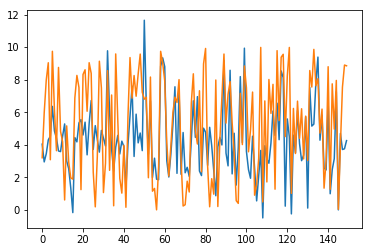

In [42]:
plt.plot(latent*30)
plt.plot(y)
plt.show()